# Importing libraries

In [1]:
import numpy as np
import pandas as pd
from statistics import mode, mean, median
from collections import Counter

# importing visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# importing data preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTEN

# importing classification models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# importing metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,f1_score, roc_auc_score, roc_curve, mean_squared_error
from sklearn import datasets, metrics, model_selection


# cross validation
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
kf = KFold(n_splits = 10)

# Importing dataset

In [2]:
missing_values = ['na', 'NA', 'N.A', '?', 'n/a', '--', 'nan']
df = pd.read_csv('risk_factors_cervical_cancer.csv', na_values = missing_values)

# Printing data type of columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

# Printing correlation heatmap

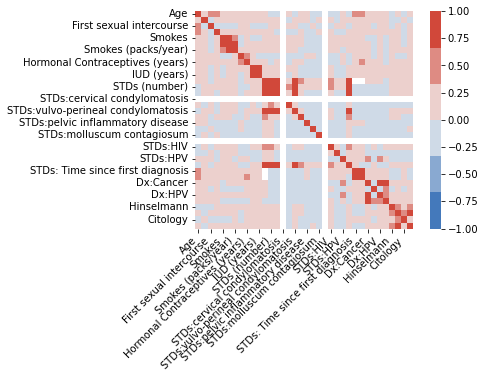

In [4]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(250, 15),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# Checking null values

In [5]:
df.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

# Checking total null values

In [6]:
df.isnull().sum().sum()

3622

# Checking null values of each columns using heatmap

<AxesSubplot:>

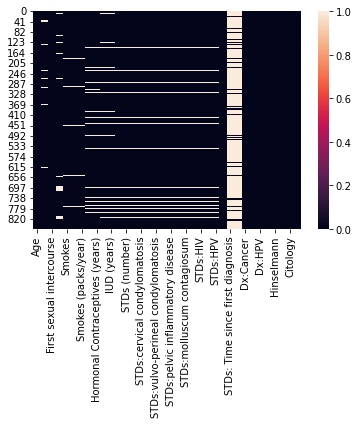

In [7]:
sns.heatmap(df.isnull())

The value of feature columns 'STDs: Time since first diagnosis' and 'STDs: Time since last diagnosis' are missing approx 91%, thus we can drop theses columns from our dataset.

# Dropping rows and columns with excessive missing values

In [8]:
df.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'], axis=1, inplace=True)
df.dropna(axis=0, how='all', inplace=True)

# Visualizing and replacing missing integer values

<AxesSubplot:xlabel='Number of sexual partners'>

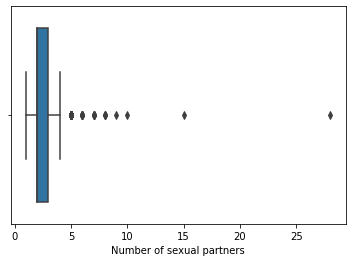

In [9]:
sns.boxplot(x = df['Number of sexual partners'])

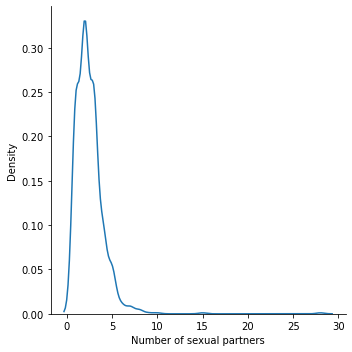

In [10]:
sns.displot(x = df['Number of sexual partners'], kind='kde')

The data in feature column 'Number of sexual partners' has multiple outlier and is positive skewed

In [11]:
df['Number of sexual partners'] = df['Number of sexual partners'].fillna(df['Number of sexual partners'].median())

<AxesSubplot:xlabel='First sexual intercourse'>

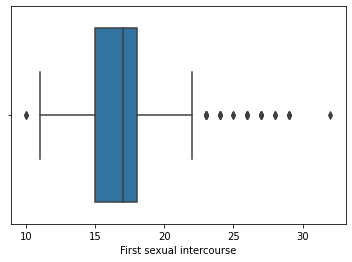

In [12]:
sns.boxplot(x = df['First sexual intercourse'])

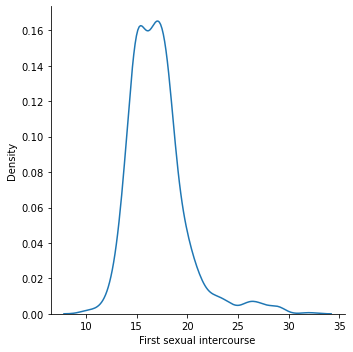

In [13]:
sns.displot(x = df['First sexual intercourse'], kind='kde')

The data in feature column 'First sexual intercourse' is positive skewed with multiple outlier

In [14]:
df['First sexual intercourse'] = df['First sexual intercourse'].fillna(df['First sexual intercourse'].median())

<AxesSubplot:xlabel='Num of pregnancies'>

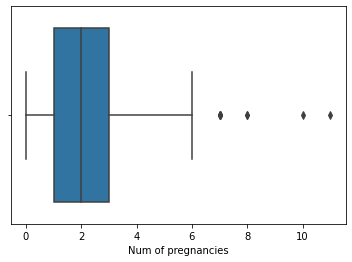

In [15]:
sns.boxplot(x = df['Num of pregnancies'])

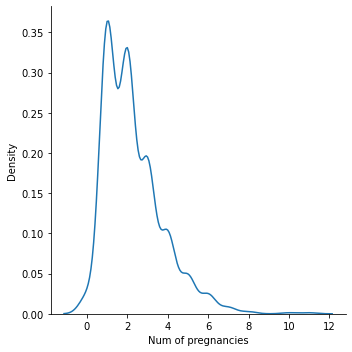

In [16]:
sns.displot(x = df['Num of pregnancies'], kind='kde')

The data in feature column 'Num of pregnancies' has few outliers and is positive skewed

In [17]:
df['Num of pregnancies'] = df['Num of pregnancies'].fillna(df['Num of pregnancies'].median())

<AxesSubplot:xlabel='Hormonal Contraceptives (years)'>

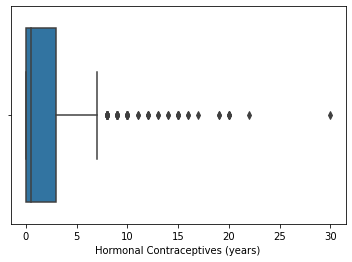

In [18]:
sns.boxplot(x = df['Hormonal Contraceptives (years)'])

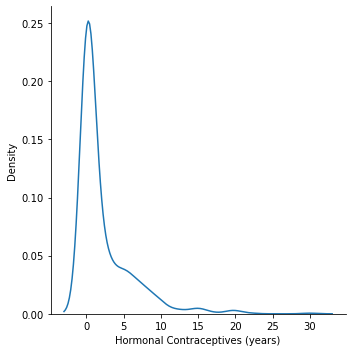

In [19]:
sns.displot(x = df['Hormonal Contraceptives (years)'], kind='kde')

The data in feature column 'Hormonal Contraceptives (years)' is positive skewed with outliers

In [20]:
df['Hormonal Contraceptives (years)'] = df['Hormonal Contraceptives (years)'].fillna(df['Hormonal Contraceptives (years)'].median())

<AxesSubplot:xlabel='IUD (years)'>

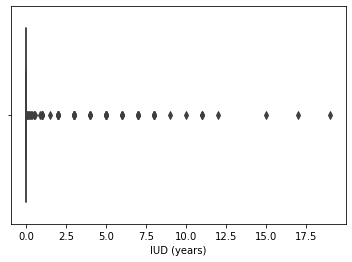

In [21]:
sns.boxplot(x = df['IUD (years)'])

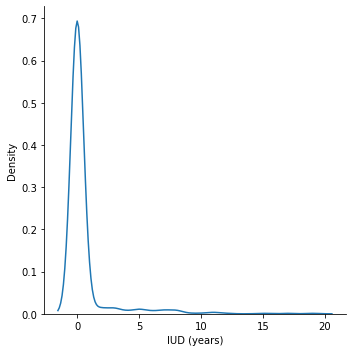

In [22]:
sns.displot(x = df['IUD (years)'], kind='kde')

The data in feature column 'IUD (years)' is positively skewed and has many outliers

In [23]:
df['IUD (years)'] = df['IUD (years)'].fillna(df['IUD (years)'].median())

<AxesSubplot:xlabel='STDs (number)'>

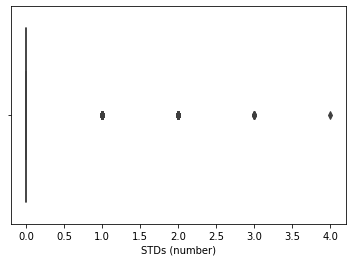

In [24]:
sns.boxplot(x = df['STDs (number)'])

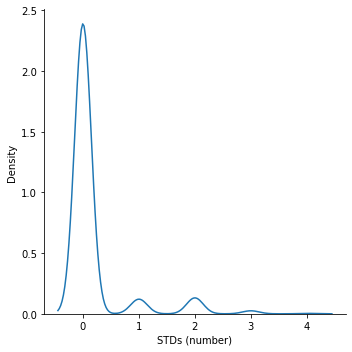

In [25]:
sns.displot(x = df['STDs (number)'], kind='kde')

The data in feature column 'STDs (number)' is positively skewed and has few outliers

In [26]:
df['STDs (number)'] = df['STDs (number)'].fillna(df['STDs (number)'].median())

<AxesSubplot:xlabel='Smokes (years)'>

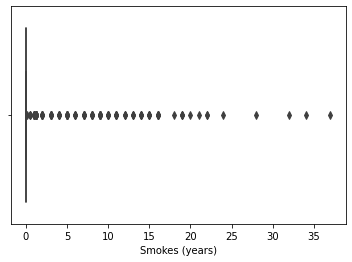

In [27]:
sns.boxplot(x = df['Smokes (years)'])

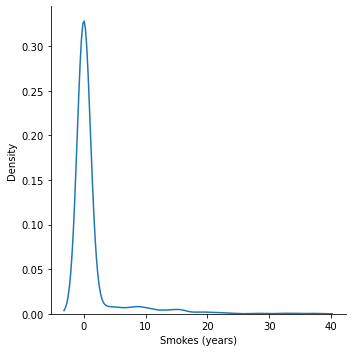

In [28]:
sns.displot(x = df['Smokes (years)'], kind='kde')

The data in feature column 'Smokes (years)' is positively skewed and has multiple outliers

In [29]:
df['Smokes (years)'] = df['Smokes (years)'].fillna(df['Smokes (years)'].median())

<AxesSubplot:xlabel='Smokes (packs/year)'>

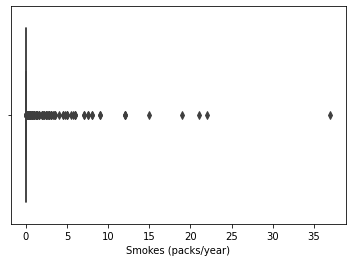

In [30]:
sns.boxplot(x = df['Smokes (packs/year)'])

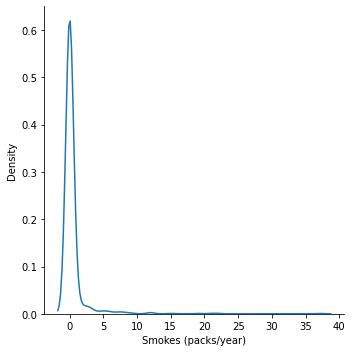

In [31]:
sns.displot(x = df['Smokes (packs/year)'], kind='kde')

The data in feature column 'Smokes (packs/year)' is positively skewed and has multiple outliers

In [32]:
df['Smokes (packs/year)'] = df['Smokes (packs/year)'].fillna(df['Smokes (packs/year)'].median())

# Visualizing and replacing missing boolean values

<AxesSubplot:xlabel='Smokes', ylabel='count'>

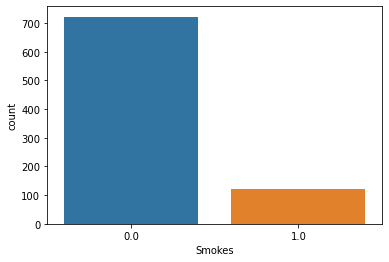

In [33]:
sns.countplot(x=df['Smokes'])

The data in feature column 'Smokes' shows the maximum instances are denoting value '0', thus it will be appropriate to fill data using mode.

In [34]:
df['Smokes'] = df['Smokes'].fillna(df['Smokes'].mode()[0])

<AxesSubplot:xlabel='Hormonal Contraceptives', ylabel='count'>

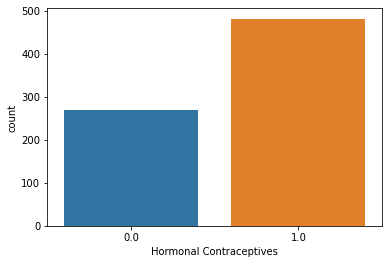

In [35]:
sns.countplot(x=df['Hormonal Contraceptives'])

The data in feature column 'Hormonal Contraceptives' shows the maximum instances are denoting value '1', thus filling the data with max class items

In [36]:
df['Hormonal Contraceptives'] = df['Hormonal Contraceptives'].fillna(df['Hormonal Contraceptives'].mode()[0])

<AxesSubplot:xlabel='IUD', ylabel='count'>

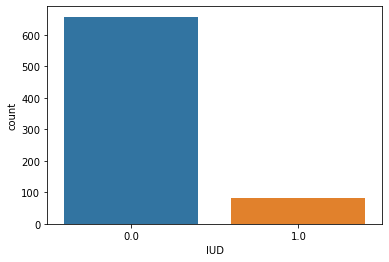

In [37]:
sns.countplot(x=df['IUD'])

The data in feature column 'IUD' shows the maximum instances are denoting value '0', thus filling the data with max class items

In [38]:
df['IUD'] = df['IUD'].fillna(df['IUD'].mode()[0])

<AxesSubplot:xlabel='STDs', ylabel='count'>

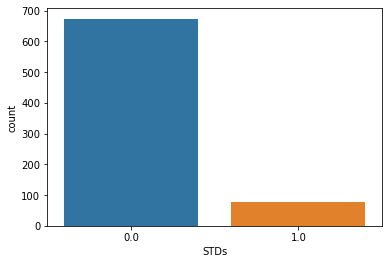

In [39]:
sns.countplot(x=df['STDs'])

The data in feature column 'STDs' shows the maximum instances are denoting value '0', thus filling the data with max class item

In [40]:
df['STDs'] = df['STDs'].fillna(df['STDs'].mode()[0])

<AxesSubplot:xlabel='STDs:condylomatosis', ylabel='count'>

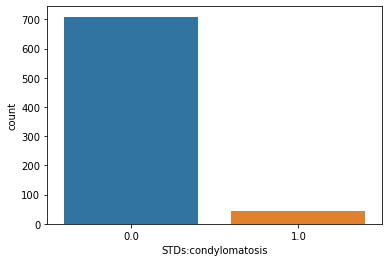

In [41]:
sns.countplot(x=df['STDs:condylomatosis'])

The data in feature column 'STDs:condylomatosis' shows the maximum instances are denoting value '0', thus filling the data with max class items

In [42]:
df['STDs:condylomatosis'] = df['STDs:condylomatosis'].fillna(df['STDs:condylomatosis'].mode()[0])

<AxesSubplot:xlabel='STDs:cervical condylomatosis', ylabel='count'>

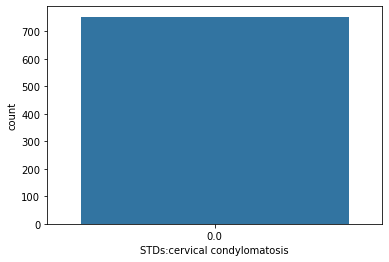

In [43]:
sns.countplot(x=df['STDs:cervical condylomatosis'])

The data in feature column 'STDs:cervical condylomatosis' shows the maximum instances are denoting value '0', thus filling the data with max class items

In [44]:
df['STDs:cervical condylomatosis'] = df['STDs:cervical condylomatosis'].fillna(df['STDs:cervical condylomatosis'].mode()[0])

<AxesSubplot:xlabel='STDs:vaginal condylomatosis', ylabel='count'>

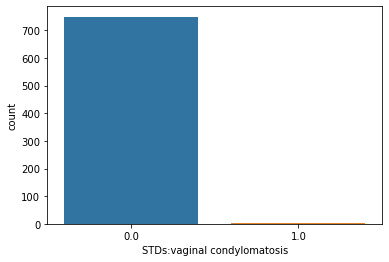

In [45]:
sns.countplot(x=df['STDs:vaginal condylomatosis'])

The data in feature column 'STDs:vaginal condylomatosis' shows the maximum instances are denoting value '0', thus filling the data with max class items

In [46]:
df['STDs:vaginal condylomatosis'] = df['STDs:vaginal condylomatosis'].fillna(df['STDs:vaginal condylomatosis'].mode()[0])

<AxesSubplot:xlabel='STDs:vulvo-perineal condylomatosis', ylabel='count'>

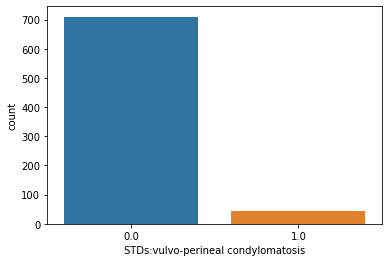

In [47]:
sns.countplot(x=df['STDs:vulvo-perineal condylomatosis'])

The data in feature column 'STDs:vulvo-perineal condylomatosis' shows the maximum instances are denoting value '0', thus filling the data with max class items

In [48]:
df['STDs:vulvo-perineal condylomatosis'] = df['STDs:vulvo-perineal condylomatosis'].fillna(df['STDs:vulvo-perineal condylomatosis'].mode()[0])

<AxesSubplot:xlabel='STDs:syphilis', ylabel='count'>

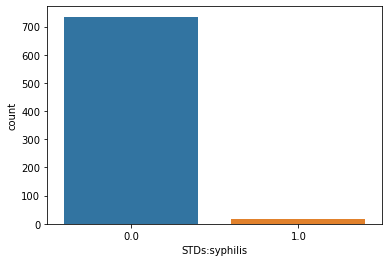

In [49]:
sns.countplot(x=df['STDs:syphilis'])

The data in feature column 'STDs:syphilis' shows the maximum instances are denoting value '0', thus filling the data with max class items

In [50]:
df['STDs:syphilis'] = df['STDs:syphilis'].fillna(df['STDs:syphilis'].mode()[0])

<AxesSubplot:xlabel='STDs:pelvic inflammatory disease', ylabel='count'>

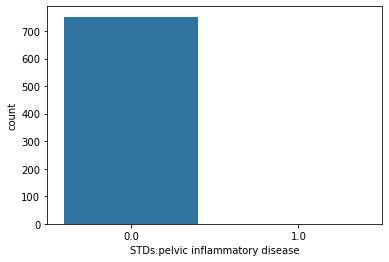

In [51]:
sns.countplot(x=df['STDs:pelvic inflammatory disease'])

The data in feature column 'STDs:pelvic inflammatory disease' shows the maximum instances are denoting value '0', thus filling the data with max class items

In [52]:
df['STDs:pelvic inflammatory disease'] = df['STDs:pelvic inflammatory disease'].fillna(df['STDs:pelvic inflammatory disease'].mode()[0])

<AxesSubplot:xlabel='STDs:genital herpes', ylabel='count'>

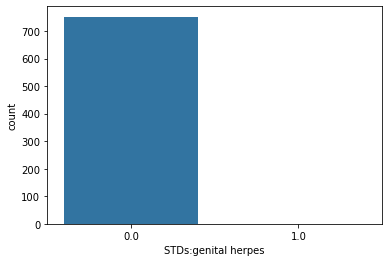

In [53]:
sns.countplot(x=df['STDs:genital herpes'])

The data in feature column 'STDs:genital herpes' shows the maximum instances are denoting value '0', thus filling the data with max class items

In [54]:
df['STDs:genital herpes'] = df['STDs:genital herpes'].fillna(df['STDs:genital herpes'].mode()[0])

<AxesSubplot:xlabel='STDs:molluscum contagiosum', ylabel='count'>

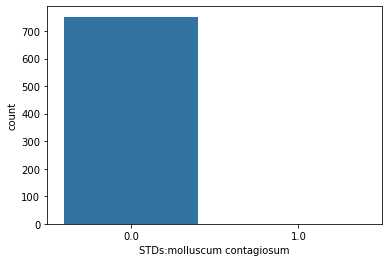

In [55]:
sns.countplot(x=df['STDs:molluscum contagiosum'])

The data in feature column 'STDs:molluscum contagiosum' shows the maximum instances are denoting value '0', thus filling the data with max class items

In [56]:
df['STDs:molluscum contagiosum'] = df['STDs:molluscum contagiosum'].fillna(df['STDs:molluscum contagiosum'].mode()[0])

<AxesSubplot:xlabel='STDs:AIDS', ylabel='count'>

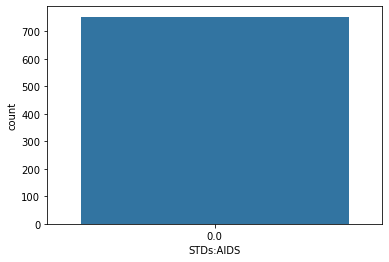

In [57]:
sns.countplot(x=df['STDs:AIDS'])

The data in feature column 'STDs:AIDS' shows the maximum instances are denoting value '0', thus filling the data with max class items

In [58]:
df['STDs:AIDS'] = df['STDs:AIDS'].fillna(df['STDs:AIDS'].mode()[0])

<AxesSubplot:xlabel='STDs:HIV', ylabel='count'>

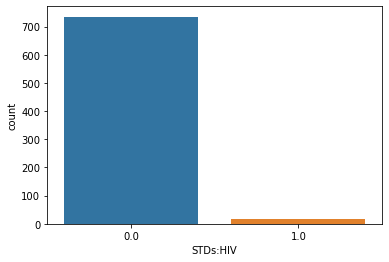

In [59]:
sns.countplot(x=df['STDs:HIV'])

The data in feature column 'STDs:HIV' shows the maximum instances are denoting value '0', thus filling the data with max class items

In [60]:
df['STDs:HIV'] = df['STDs:HIV'].fillna(df['STDs:HIV'].mode()[0])

<AxesSubplot:xlabel='STDs:Hepatitis B', ylabel='count'>

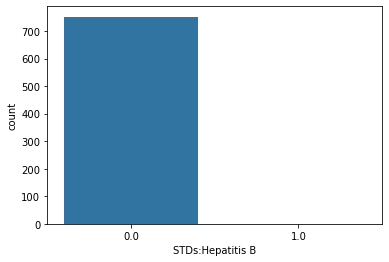

In [61]:
sns.countplot(x=df['STDs:Hepatitis B'])

The data in feature column 'STDs:Hepatitis B' shows the maximum instances are denoting value '0', thus filling the data with max class items

In [62]:
df['STDs:Hepatitis B'] = df['STDs:Hepatitis B'].fillna(df['STDs:Hepatitis B'].mode()[0])

<AxesSubplot:xlabel='STDs:HPV', ylabel='count'>

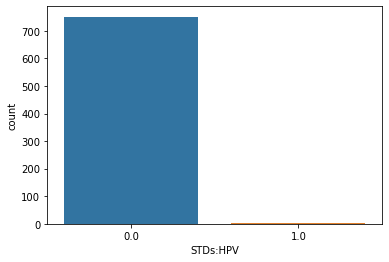

In [63]:
sns.countplot(x=df['STDs:HPV'])

The data in feature column 'STDs:HPV' shows the maximum instances are denoting value '0', thus filling the data with max class items

In [64]:
df['STDs:HPV'] = df['STDs:HPV'].fillna(df['STDs:HPV'].mode()[0])

In [65]:
df.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


# Splitting dataset into dependent and independent variables.

In [66]:
X = df.iloc[:,:-4].values
y = df.iloc[:,-1].values

# Feature scaling

In [67]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
print(X.shape)

(858, 30)


# Applying T-SNE

In [68]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 6, method = 'exact')
X = tsne.fit_transform(X)
print(X.shape)

C:\Users\rao-a\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\rao-a\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(858, 6)


# Handling class imbalance problem

In [69]:
sm = SMOTEN(random_state=42)
X_over, y_over = sm.fit_resample(X, y)

# Training the Logistic regression model

In [70]:
logreg = LogisticRegression(random_state = 0)
score = cross_val_score(logreg, X_over, y_over, cv=kf)

#  Predicting test set results (Logistic regression)

In [71]:
y_pred = cross_val_predict(logreg, X_over, y_over, cv = 10)

# Making confusion matrix (Logistic regression)

Accuracy score  0.9645080946450809
Precision score  0.9973333333333333
Recall score 0.9315068493150684
F1 score 0.9632968448164841
MSE 0.03549190535491906


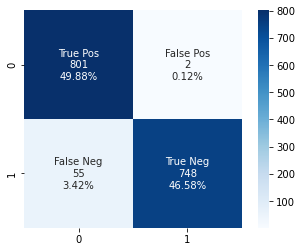

In [72]:
print("Accuracy score ", accuracy_score(y_over, y_pred))
print("Precision score ", precision_score(y_over, y_pred))
print("Recall score", recall_score(y_over, y_pred))
print("F1 score", f1_score(y_over, y_pred))
print("MSE", mean_squared_error(y_over, y_pred))


# Creating heatmap for confusion matrix
group_names = ['True Pos', 'False Pos', 'False Neg', 'True Neg']
test_cnf_matrix = confusion_matrix(y_over,y_pred)
test_counts = ["{0:0.0f}".format(value) for value in test_cnf_matrix.flatten()]
test_percentage = ["{0:.2%}".format(value) for value in test_cnf_matrix .flatten()/np.sum(test_cnf_matrix)]
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,test_counts,test_percentage)]
test_labels = np.asarray(test_labels).reshape(2,2)
sns.heatmap(test_cnf_matrix, annot=test_labels, fmt='', cmap='Blues', square=True);

# Visualizing the outputs (LR)

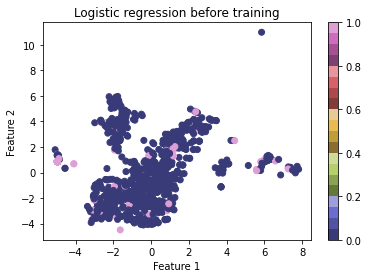

In [73]:
plt.scatter(X_over[:,0], X_over[:,1], c= y_over, cmap = "tab20b")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Logistic regression before training")
plt.colorbar()
plt.show()

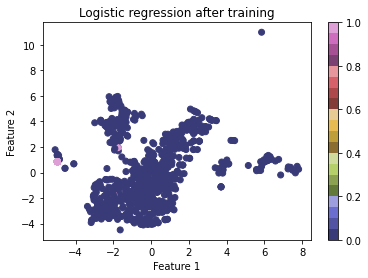

In [74]:
plt.scatter(X_over[:,0], X_over[:,1], c= y_pred, cmap = "tab20b")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Logistic regression after training")
plt.colorbar()
plt.show()

# Training the KNN model

In [75]:
knn = KNeighborsClassifier(n_neighbors=5)

score_knn = cross_val_score(knn, X_over, y_over, cv=kf)

# Predicting test results (KNN)

In [76]:
y_pred_knn = cross_val_predict(knn, X_over, y_over, cv = 10)

# Creating confusion matrix (KNN)

Accuracy score  0.9613947696139477
Precision score  0.990728476821192
Recall score 0.9315068493150684
F1 score 0.9602053915275994
MSE 0.038605230386052306


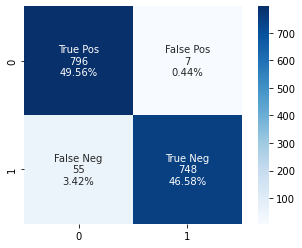

In [77]:
print("Accuracy score ", accuracy_score(y_over, y_pred_knn))
print("Precision score ", precision_score(y_over, y_pred_knn))
print("Recall score", recall_score(y_over, y_pred_knn))
print("F1 score", f1_score(y_over, y_pred_knn))
print("MSE", mean_squared_error(y_over, y_pred_knn))

# Creating heatmap for confusion matrix
group_names = ['True Pos', 'False Pos', 'False Neg', 'True Neg']
test_cnf_matrix = confusion_matrix(y_over,y_pred_knn)
test_counts = ["{0:0.0f}".format(value) for value in test_cnf_matrix.flatten()]
test_percentage = ["{0:.2%}".format(value) for value in test_cnf_matrix .flatten()/np.sum(test_cnf_matrix)]
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,test_counts,test_percentage)]
test_labels = np.asarray(test_labels).reshape(2,2)
sns.heatmap(test_cnf_matrix, annot=test_labels, fmt='', cmap='Blues', square=True);

# Visualizing the results (KNN)

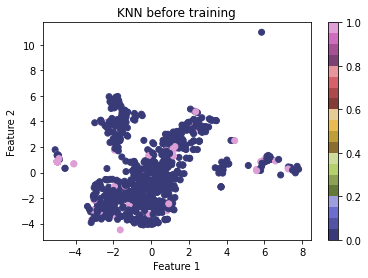

In [78]:
plt.scatter(X_over[:,0], X_over[:,1], c= y_over, cmap = "tab20b")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("KNN before training")
plt.colorbar()
plt.show()

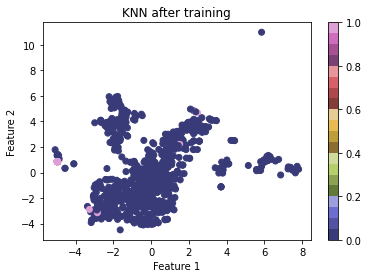

In [79]:
plt.scatter(X_over[:,0], X_over[:,1], c= y_pred_knn, cmap = "tab20b")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("KNN after training")
plt.colorbar()
plt.show()

# Training SVM model

In [80]:
svm = SVC(probability=True)

score_svm = cross_val_score(svm, X_over, y_over, cv=kf)

# Predicting test results (SVM)

In [81]:
y_pred_svm = cross_val_predict(svm, X_over, y_over, cv = 10)

# Creating confusion matrix (SVM)

Accuracy score  0.9657534246575342
Precision score  1.0
Recall score 0.9315068493150684
F1 score 0.9645390070921985
MSE 0.03424657534246575


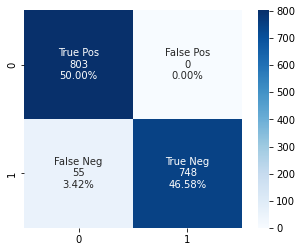

In [82]:
print("Accuracy score ", accuracy_score(y_over, y_pred_svm))
print("Precision score ", precision_score(y_over, y_pred_svm))
print("Recall score", recall_score(y_over, y_pred_svm))
print("F1 score", f1_score(y_over, y_pred_svm))
print("MSE", mean_squared_error(y_over, y_pred_svm))

# Creating heatmap for confusion matrix
group_names = ['True Pos', 'False Pos', 'False Neg', 'True Neg']
test_cnf_matrix = confusion_matrix(y_over,y_pred_svm)
test_counts = ["{0:0.0f}".format(value) for value in test_cnf_matrix.flatten()]
test_percentage = ["{0:.2%}".format(value) for value in test_cnf_matrix .flatten()/np.sum(test_cnf_matrix)]
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,test_counts,test_percentage)]
test_labels = np.asarray(test_labels).reshape(2,2)
sns.heatmap(test_cnf_matrix, annot=test_labels, fmt='', cmap='Blues', square=True);

# Visualizing the outputs (SVM)

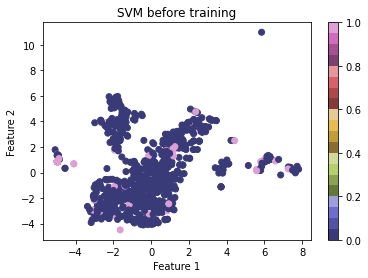

In [83]:
plt.scatter(X_over[:,0], X_over[:,1], c= y_over, cmap = "tab20b")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("SVM before training")
plt.colorbar()
plt.show()

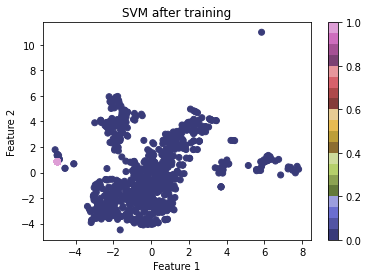

In [84]:
plt.scatter(X_over[:,0], X_over[:,1], c= y_pred_svm, cmap = "tab20b")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("SVM after training")
plt.colorbar()
plt.show()

# Training Random Forest model

In [85]:
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
score_rf = cross_val_score(rf, X_over, y_over, cv=kf)

# Predicting test results (Random Forest Model)

In [86]:
y_pred_rf = cross_val_predict(rf, X_over, y_over, cv = 10)

# Creating confusion matrix (Random Forest Model)

Accuracy score  0.9595267745952677
Precision score  0.9868073878627969
Recall score 0.9315068493150684
F1 score 0.9583600256245995
MSE 0.040473225404732256


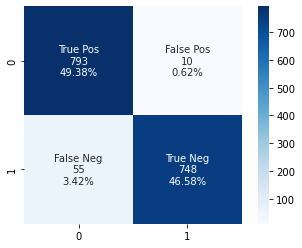

In [87]:
print("Accuracy score ", accuracy_score(y_over, y_pred_rf))
print("Precision score ", precision_score(y_over, y_pred_rf))
print("Recall score", recall_score(y_over, y_pred_rf))
print("F1 score", f1_score(y_over, y_pred_rf))
print("MSE", mean_squared_error(y_over, y_pred_rf))

# Creating heatmap for confusion matrix
group_names = ['True Pos', 'False Pos', 'False Neg', 'True Neg']
test_cnf_matrix = confusion_matrix(y_over,y_pred_rf)
test_counts = ["{0:0.0f}".format(value) for value in test_cnf_matrix.flatten()]
test_percentage = ["{0:.2%}".format(value) for value in test_cnf_matrix .flatten()/np.sum(test_cnf_matrix)]
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,test_counts,test_percentage)]
test_labels = np.asarray(test_labels).reshape(2,2)
sns.heatmap(test_cnf_matrix, annot=test_labels, fmt='', cmap='Blues', square=True);

# Visualizing the outputs (RF)

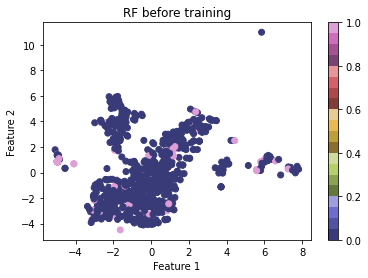

In [88]:
plt.scatter(X_over[:,0], X_over[:,1], c= y_over, cmap = "tab20b")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("RF before training")
plt.colorbar()
plt.show()

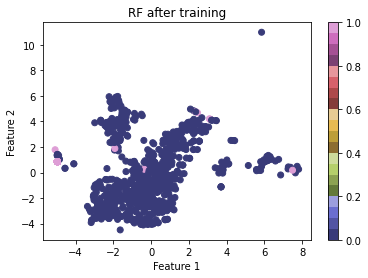

In [89]:
plt.scatter(X_over[:,0], X_over[:,1], c= y_pred_rf, cmap = "tab20b")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("RF after training")
plt.colorbar()
plt.show()